Importing libraries and data..

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from scipy import stats

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#from wordcloud import WordCloud
from PIL import Image
#from py_lex import EmoLex

import math
from os import path
import re
from collections import Counter

In [33]:
!pip install py_lex

In [34]:
from py_lex import EmoLex

Reading data..

In [35]:
data = pd.read_csv("../input/acustico/lpda_albums_fixed.csv",sep=';')

In [36]:
data

,id,title,url,lyrics,album,duplicated
0,750807,Algo de Vos,https://genius.com/Las-pastillas-del-abuelo-al...,"[Letra de ""Algo de Vos""] [Verso 1] He limpi...",Acústicos e Inéditos,False
1,3823057,Almafuerte,https://genius.com/Las-pastillas-del-abuelo-al...,"[Letra de ""Almafuerte""] [Verso] Yo sé que f...",Acústicos e Inéditos,False
2,4677441,Almagro Haedo,https://genius.com/Las-pastillas-del-abuelo-al...,"[Letra de ""Almagro Haedo""] [Verso 1] Me abr...",Acústicos e Inéditos,False
3,759616,Ama a Quien Llora Por Ti,https://genius.com/Las-pastillas-del-abuelo-am...,"[Letra de ""Ama a Quien Llora Por Ti""] [Vers...",Acústicos e Inéditos,False
4,4677480,Calipso (Acústico),https://genius.com/Las-pastillas-del-abuelo-ca...,"[Letra de ""Calipso (Acústico)""] [Verso 1] U...",Acústicos e Inéditos,False
5,4677493,Candombe II (Acústico),https://genius.com/Las-pastillas-del-abuelo-ca...,"[Letra de ""Candombe II (Acústico)""] [Verso ...",Acústicos e Inéditos,False
6,4677496,Candombe Loco (Acústico),https://genius.com/Las-pastillas-del-abuelo-ca...,"[Letra de ""Candombe Loco (Acústico)""] [Vers...",Acústicos e Inéditos,False
7,1961313,Cerveza (Acústico),https://genius.com/Las-pastillas-del-abuelo-ce...,"[Letra de ""Cerveza (Acústico)""] [Verso 1] C...",Acústicos e Inéditos,False
8,750577,Clasica Y Moderna,https://genius.com/Las-pastillas-del-abuelo-cl...,"[Letra de ""Clásica y Moderna""] [Verso 1] No...",Acústicos e Inéditos,False
9,4709779,Cubano (Acústico),https://genius.com/Las-pastillas-del-abuelo-cu...,"[Letra de ""Cubano (Acústico)""] [Verso 1] Ad...",Acústicos e Inéditos,False


With a wordcount, we can get the most used words

In [37]:
data = data.dropna(subset=['lyrics'])

In [38]:
data['words'] = data.lyrics.str.strip().str.split('[\W_]+')

In [39]:
rows = list()
for row in data[['words']].iterrows():
    r = row[1]
    for word in r.words:
        rows.append((word))

words = pd.DataFrame(rows, columns=['word'])
words.head()

,word
0,
1,Letra
2,de
3,Algo
4,de


In [40]:
words = words[words.word.str.len() > 0]
words['word'] = words.word.str.lower()
words.head()

,word
1,letra
2,de
3,algo
4,de
5,vos


In [41]:
counts = words\
    .word.value_counts()\
    .to_frame()\
    .rename(columns={'word':'n_w'})
counts

,n_w
que,449
de,336
no,279
y,276
la,239
...,...
transmitís,1
copa,1
roba,1
mejilla,1


In [42]:
stopwords = stopwords.words('spanish') #Deleting stopwords

In [43]:
for a_stopword in stopwords:
    if a_stopword in counts.index:
        counts = counts.drop(a_stopword)

In [44]:
counts.head(20)

,n_w
verso,101
siempre,64
coro,57
va,41
vos,41
soledad,40
letra,40
2,38
1,38
ser,36


In [45]:
counts = counts.drop('verso') #Also, we need to delete some words that are wrong..
counts = counts.drop('coro') 
counts = counts.drop('1') 
counts = counts.drop('2') 
counts = counts.drop('3') 
counts = counts.drop('letra') 

In [46]:
counts.head()

,n_w
siempre,64
va,41
vos,41
soledad,40
ser,36


In [47]:
top_20 = counts.head(20) 
top_20

,n_w
siempre,64
va,41
vos,41
soledad,40
ser,36
nunca,36
amor,34
country,34
si,31
corazón,26


In [48]:
top_20.to_csv('top_20.csv', sep=';',index=False) #Saving the top20 most used words into a csv

In [49]:
data['lyrics'].replace(regex=True,inplace=True,to_replace='coro',value=' ') #Also, the word 'coro' isn't part of the songs

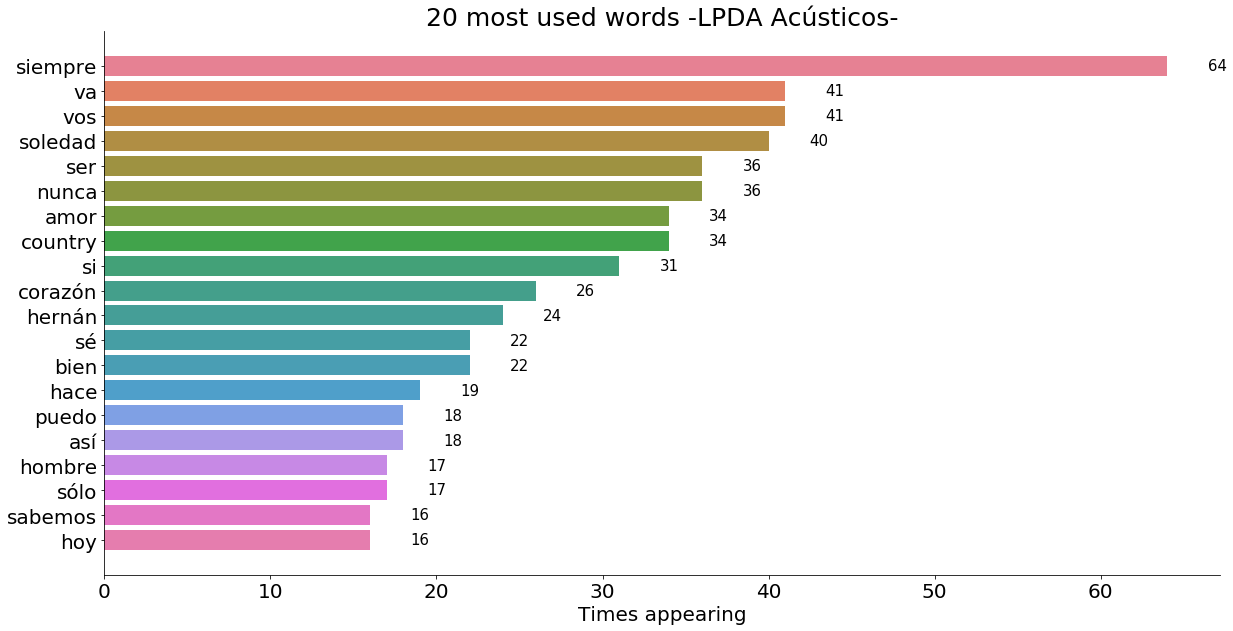

In [50]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x="n_w", y=top_20.index, data=top_20, palette=sns.color_palette("husl", n_colors=20))
plt.ylabel("")
plt.xlabel('Times appearing', fontsize=20)
plt.title('20 most used words -LPDA Acústicos-', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 3  ,
            p.get_y() + p.get_height()/1.4,
            "%d" % width,
            ha="center", fontsize=15)
sns.despine()
plt.savefig('top_words_in_songs.jpg')
plt.plot();

Sentiment analysis with EmoLex

In [65]:
lexicon = EmoLex('../input/lexicon/lexicon_spanish.txt') #That lexicon was translate from english to spanish with google translator

In [52]:
stopset = set(stopwords)
data['tokens'] = pd.Series(dtype=object)
for index, row in data.iterrows():
    try:
        tokens = word_tokenize(row['lyrics'])
        tokens_wo_stopwords = [word for word in tokens if not word in stopset]
        data.at[index, 'tokens'] = tokens_wo_stopwords
    except:
        continue

In [53]:
summary = lexicon.summarize_doc(data.loc[10].tokens)

In [54]:
summary

{'fear': 0.09580838323353294,
 'joy': 0.005988023952095809,
 'anger': 0.08982035928143713,
 'disgust': 0.059880239520958084,
 'trust': 0.029940119760479042,
 'anticipation': 0.03592814371257485,
 'negative': 0.1437125748502994,
 'surprise': 0.05389221556886228,
 'positive': 0.041916167664670656,
 'sadness': 0.08982035928143713}

In [55]:
data['anger'] = 0.0
data['anticipation'] = 0.0
data['disgust'] = 0.0
data['fear'] = 0.0
data['joy'] = 0.0
data['negative'] = 0.0
data['positive'] = 0.0
data['sadness'] = 0.0
data['surprise'] = 0.0
data['trust'] = 0.0

In [56]:
for index, _ in data.iterrows():
    try:
        to_lower = list(map(lambda x:x.lower(),data.loc[index].tokens))
        summary = lexicon.summarize_doc(to_lower)
        for key in summary.keys():
            data.at[index, key] = summary[key]
    except:
        continue

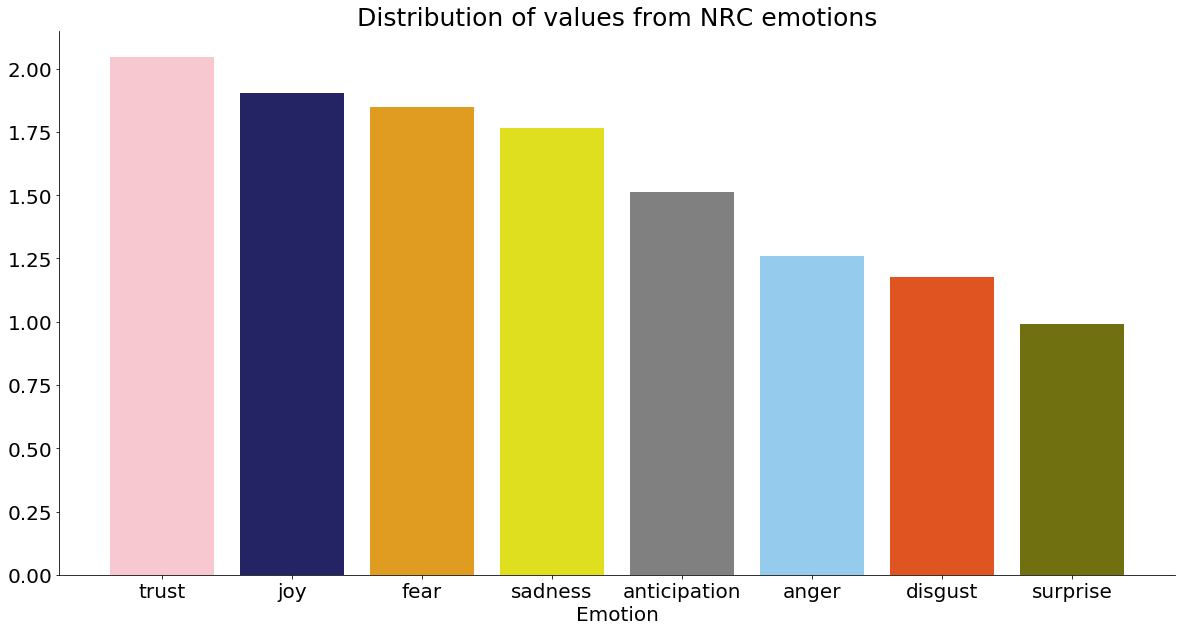

In [57]:
total_sentiments = pd.DataFrame(data.sum()[['fear', 'sadness', 'surprise', 'trust', 'joy', 'anticipation', 'anger', 'disgust']].sort_values(ascending=False))
colors = ['pink', 'midnightblue', 'orange', 'yellow', 'grey', 'lightskyblue', 'orangered',  'olive']
total_sentiments.columns = ['value']

fig, ax = plt.subplots(figsize=(20,10))
ax = sns.barplot(x=total_sentiments.index, y='value', data=total_sentiments, palette=sns.color_palette(colors))
plt.ylabel("")
plt.xlabel('Emotion', fontsize=20)
plt.title('Distribution of values from NRC emotions', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
sns.despine()
plt.savefig('nrc_emotions.jpg')
plt.plot();

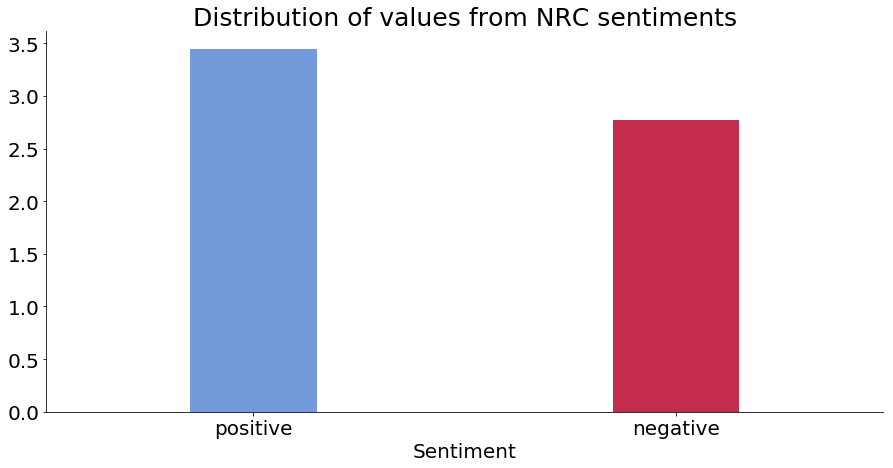

In [58]:
total_sentiment = pd.DataFrame(data.sum()[['positive', 'negative']])
total_sentiment.columns = ['value']

fig, ax = plt.subplots(figsize=(15,7))
ax = sns.barplot(x=total_sentiment.index, y='value', data=total_sentiment, palette=sns.color_palette(['cornflowerblue', 'crimson']))
plt.ylabel("")
plt.xlabel('Sentiment', fontsize=20)
plt.title('Distribution of values from NRC sentiments', fontsize=25)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(20) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(20)
for patch in ax.patches :
    current_width = patch.get_width()
    diff = current_width - .3

    # we change the bar width
    patch.set_width(.3)

    # we recenter the bar
    patch.set_x(patch.get_x() + diff * .5)
sns.despine()
plt.savefig('nrc_sentiments.jpg')
plt.plot();

In [59]:
columns = ['word','fear', 'sadness', 'surprise', 'trust', 'joy', 'anticipation', 'anger', 'disgust', 'positive', 'negative']

In [60]:
word_appearances_by_sentiment = pd.DataFrame(columns=columns)
for index, _ in data.iterrows():
    try:
        to_lower = list(map(lambda x:x.lower(),data.loc[index].tokens))
        annotation = lexicon.annotate_doc(to_lower)
        for token, a_set in zip(to_lower, annotation):
            row = [token] + [x in a_set for x in columns[1:]]
            appending_data = pd.DataFrame([row], columns=columns)
            word_appearances_by_sentiment = word_appearances_by_sentiment.append(appending_data)
    except:
        continue
word_appearances_by_sentiment = word_appearances_by_sentiment.groupby("word").agg(
    {'anger': np.sum,
     'anticipation': np.sum,
     'disgust': np.sum,
     'fear': np.sum,
     'joy': np.sum,
     'negative': np.sum,
     'positive': np.sum,
     'sadness': np.sum,
     'surprise': np.sum,
     'trust': np.sum}
)

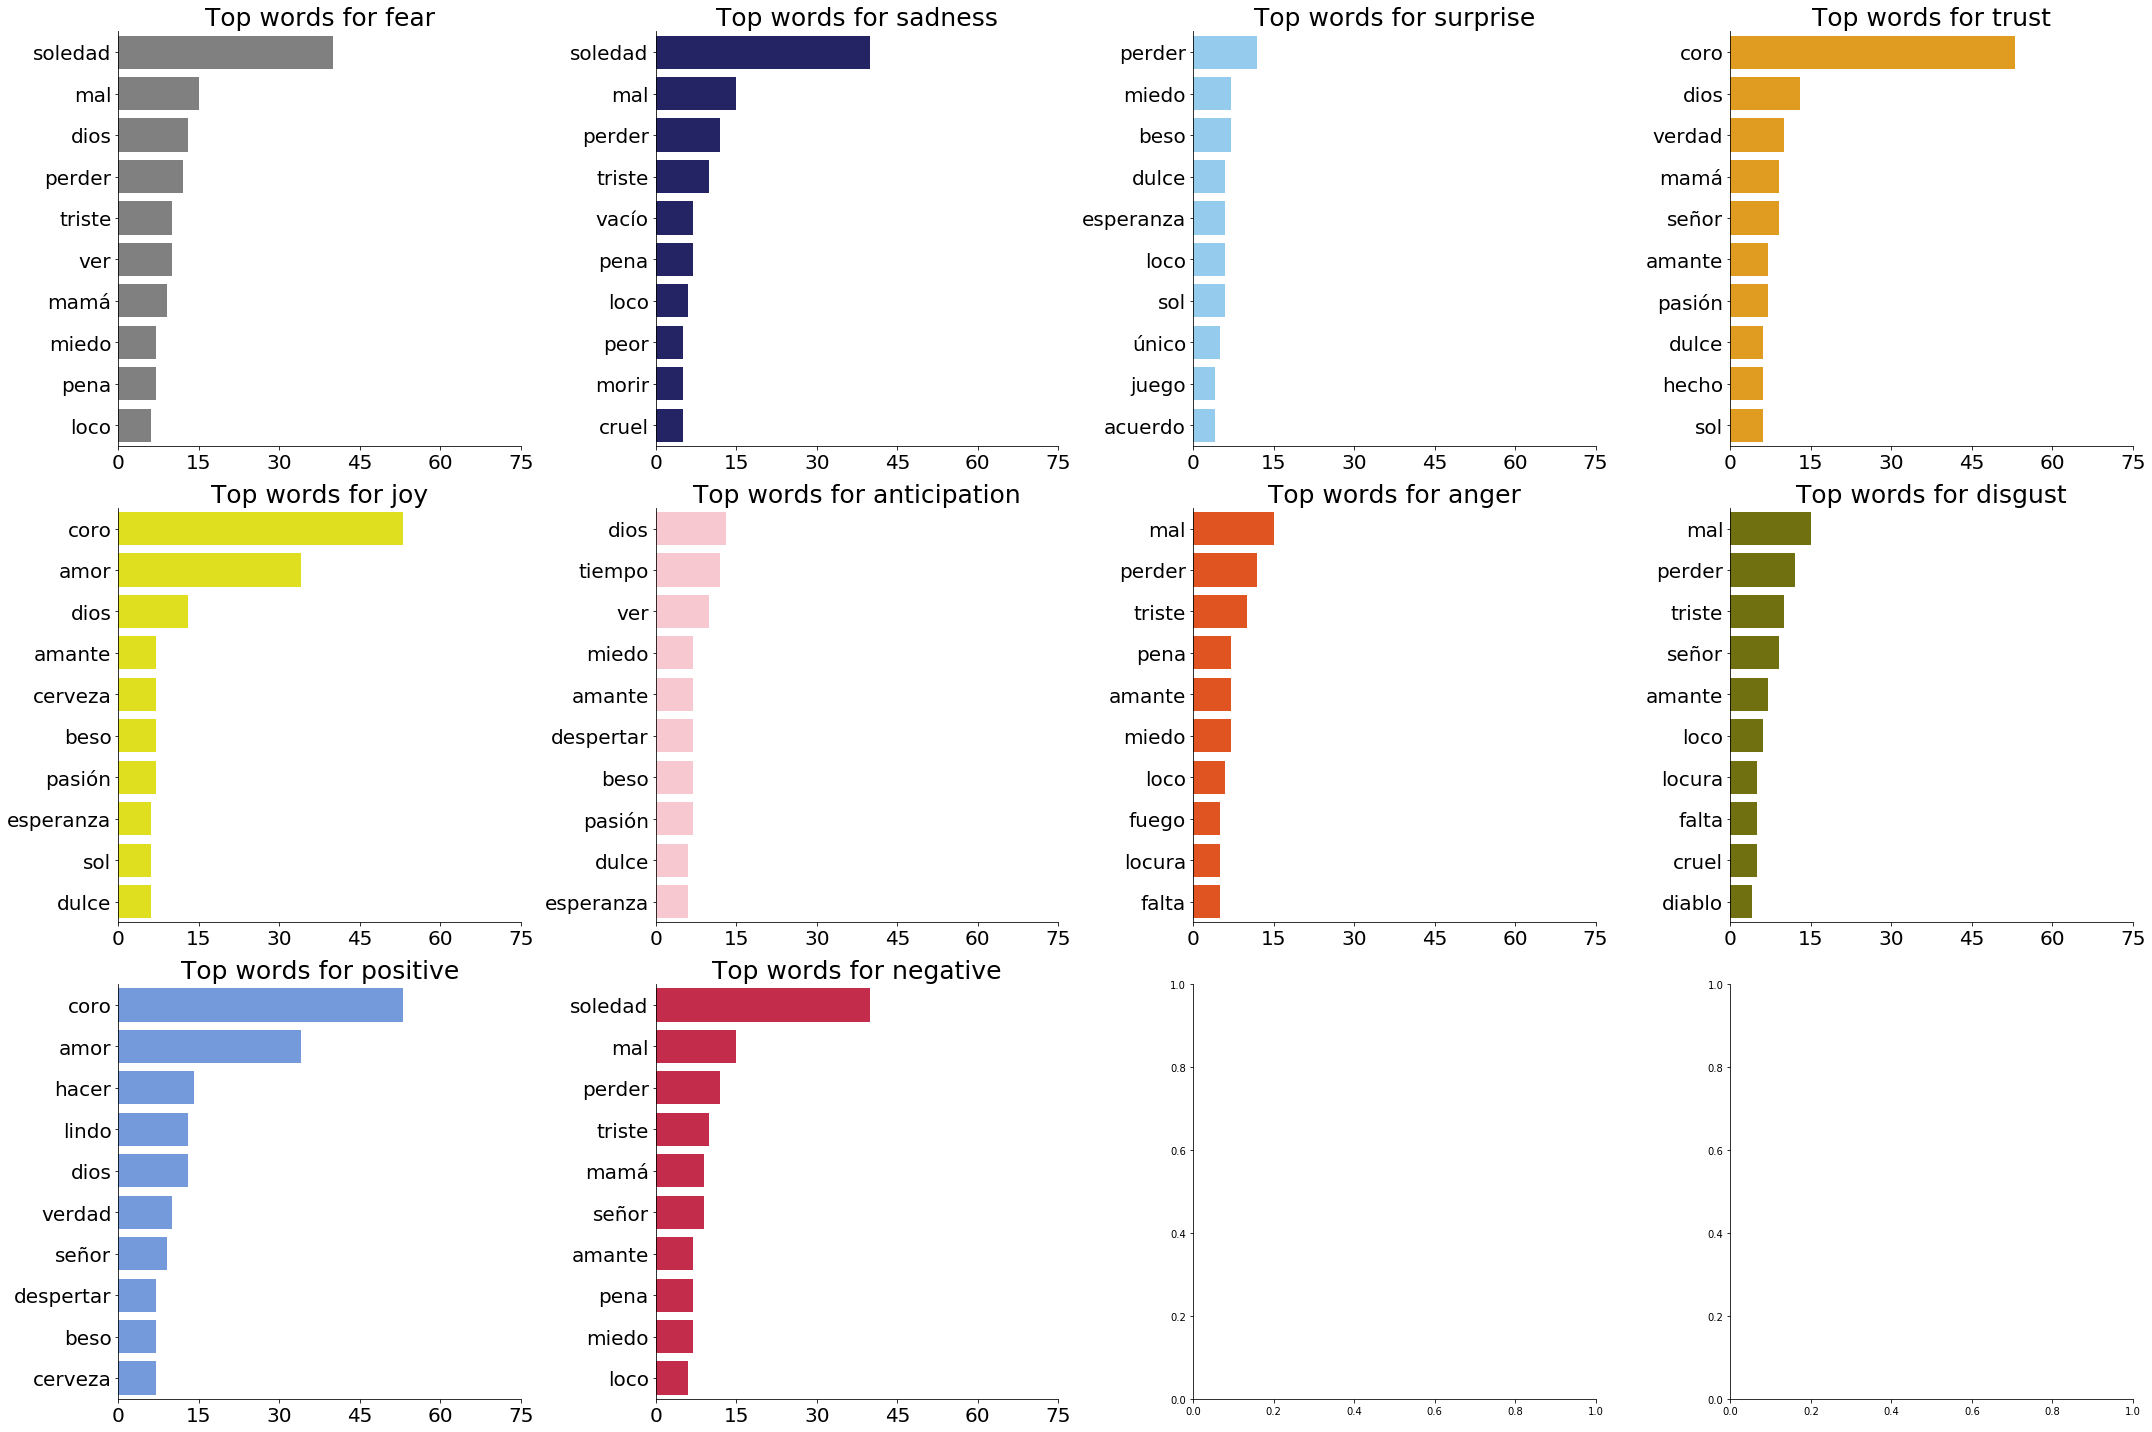

In [61]:
ROWS = 3
COLS = 4
cols_to_iterate = columns[1:]
colors = ['grey', 'midnightblue', 'lightskyblue', 'orange', 'yellow', 'pink', 'orangered', 'olive', 'cornflowerblue', 'crimson']
fig, axes = plt.subplots(nrows=ROWS, ncols=COLS, figsize=(30,20))
words_which_appear = []
for row in range(ROWS):
    for col in range(COLS):
        if not cols_to_iterate:
            break
        a_column = cols_to_iterate.pop(0)
        a_color = colors.pop(0)
        a_data = pd.DataFrame(word_appearances_by_sentiment.sort_values(by=[a_column], ascending=False)[a_column][:10])
        words_which_appear.extend(a_data.index)
        a_data.columns = ['count']
        sns.barplot(a_data['count'], a_data.index,orient='h', color=a_color, ax=axes[row, col])
        axes[row, col].set_title('Top words for %s' % a_column, fontsize=25)
        if max(a_data['count']) > 90:
            axes[row, col].set_xticks(range(0,max(a_data['count']), 15))
        else:
            axes[row, col].set_xticks(range(0,80, 15))
        for tick in axes[row, col].xaxis.get_major_ticks():
            tick.label.set_fontsize(20) 
        for tick in axes[row, col].yaxis.get_major_ticks():
            tick.label.set_fontsize(20)
        axes[row, col].set_ylabel("")
        axes[row, col].set_xlabel("")

words_which_appear = Counter(words_which_appear)        
sns.despine()
plt.tight_layout()
plt.savefig('top_words_for_emotions.jpg')
plt.show()

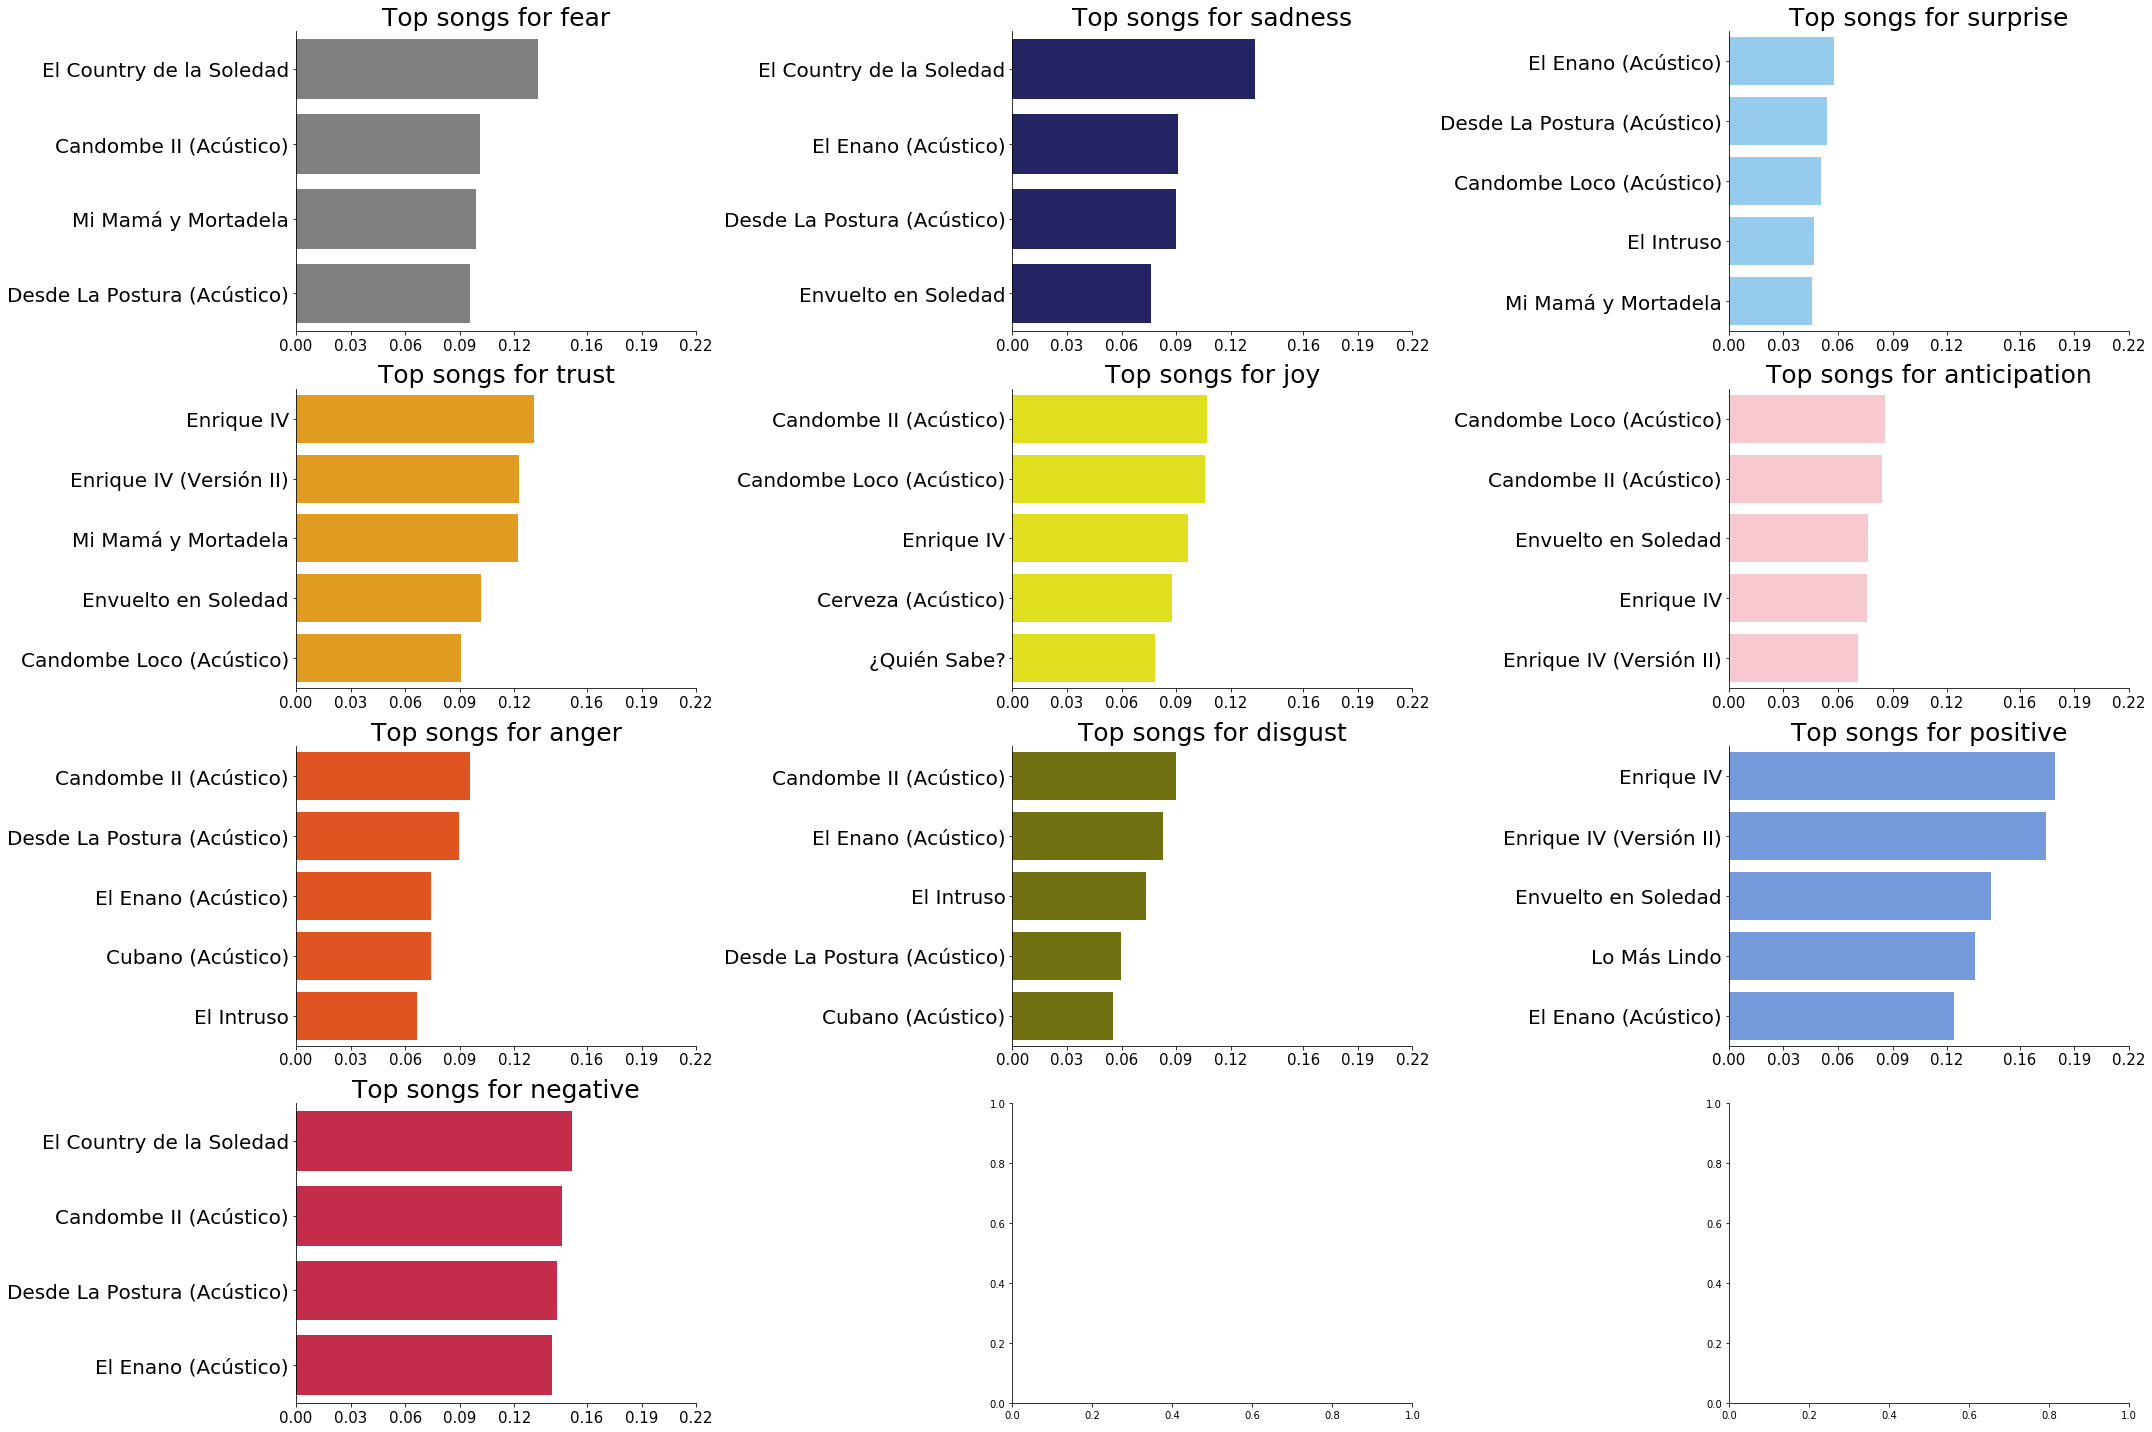

In [62]:
ROWS = 4
COLS = 3
cols_to_iterate = columns[1:]
colors = ['grey', 'midnightblue', 'lightskyblue', 'orange', 'yellow', 'pink', 'orangered', 'olive', 'cornflowerblue', 'crimson']
fig, axes = plt.subplots(nrows=ROWS, ncols=COLS, figsize=(30,20))
songs_which_appear = []
for row in range(ROWS):
    for col in range(COLS):
        if not cols_to_iterate:
            break
        a_column = cols_to_iterate.pop(0)
        a_color = colors.pop(0)
        a_data = pd.DataFrame(data.sort_values(by=[a_column], ascending=False)[['title',a_column]][:5])
        songs_which_appear.extend(a_data.title)
        sns.barplot(a_data[a_column], a_data.title, orient='h', color=a_color, ax=axes[row, col])
        axes[row, col].set_title('Top songs for %s' % a_column, fontsize=25)
        axes[row, col].set_xticks(np.around(np.arange(0.0, .25, .25 / 8), decimals=2))
        for tick in axes[row, col].xaxis.get_major_ticks():
            tick.label.set_fontsize(15) 
            #tick.label.set_rotation(60)
        for tick in axes[row, col].yaxis.get_major_ticks():
            tick.label.set_fontsize(20)
        axes[row, col].set_ylabel("")
        axes[row, col].set_xlabel("")

songs_which_appear = Counter(songs_which_appear)        
sns.despine()
fig.tight_layout()
plt.savefig('top_songs_for_emotions.jpg')
plt.show()